<a href="https://colab.research.google.com/github/K20qhuy/ML-APP-HK241/blob/main/BTLML%26APP_Wine_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Preprocessing data

In [18]:
# loading the dataset to a Pandas DataFrame

wine_dataset = pd.read_csv('/content/winequality-red.csv')

In [19]:
# Create binary classification: good (1) vs. bad (0)
wine_dataset['quality'] = wine_dataset['quality'].apply(lambda x: 1 if x >= 6 else 0)

# Split the dataset into features (X) and target (y)
X = wine_dataset.drop('quality', axis=1).values
y = wine_dataset['quality'].values

# Feature scaling: Normalize the features (z-score standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Logistic Regression

In [20]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Cost function

In [43]:
def cost_function(X, y, weights, bias):
    m = len(X)  # number of training examples
    # Predictions using the sigmoid function
    predictions = sigmoid(np.dot(X, weights) + bias)
    # Cost function: Binary Cross-Entropy / Log-Loss
    cost = (-1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost


Gradient descent: minimize the cost function and update the weights & bias.

In [47]:
def gradient_descent(X, y, weights, bias, learning_rate, num_iterations):
    m = len(X) # function m = X.shape[0] is more recommended/universal than len(X)
    costs = []

    for i in range(num_iterations):
        # Forward pass (compute predictions)
        predictions = sigmoid(np.dot(X, weights) + bias)

        # Compute the gradients (partial derivatives)
        dw = (1/m) * np.dot(X.T, (predictions - y))
        db = (1/m) * np.sum(predictions - y)

        # Update the parameters (weights and bias)
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Compute the cost and save it for plotting
        cost = cost_function(X, y, weights, bias)
        costs.append(cost)

        # Print the cost every 100 iterations to track progress
        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost:.4f}")

    return weights, bias, costs


Train the Logistic regression model




In [48]:
# Initialize weights and bias
weights = np.zeros(X_train.shape[1])  # Number of features in X_train
bias = 0

# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Train the model using gradient descent
weights, bias, costs = gradient_descent(X_train, y_train, weights, bias, learning_rate, num_iterations)


Iteration 0, Cost: 0.6920
Iteration 100, Cost: 0.6135
Iteration 200, Cost: 0.5772
Iteration 300, Cost: 0.5582
Iteration 400, Cost: 0.5470
Iteration 500, Cost: 0.5400
Iteration 600, Cost: 0.5353
Iteration 700, Cost: 0.5320
Iteration 800, Cost: 0.5295
Iteration 900, Cost: 0.5276


Evaluate the Wine model
+ Precision: Of all the wines predicted as "good", how many were actually good.
+ Recall: Of all the wines that were actually good, how many were predicted correctly.
+ F1-Score: The harmonic mean of precision and recall, giving a single metric that balances the two.

In [52]:
def predict(X, weights, bias):
    # Compute the model's predictions (probabilities)
    predictions = sigmoid(np.dot(X, weights) + bias)
    # Convert probabilities to binary predictions (0 or 1)
    return (predictions >= 0.5).astype(int)

# Predict on the test data
y_pred = predict(X_test, weights, bias)

# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Accuracy: 0.7281
Confusion Matrix:
[[107  34]
 [ 53 126]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.76      0.71       141
           1       0.79      0.70      0.74       179

    accuracy                           0.73       320
   macro avg       0.73      0.73      0.73       320
weighted avg       0.74      0.73      0.73       320



Visualize how the cost function decreases over iterations during training

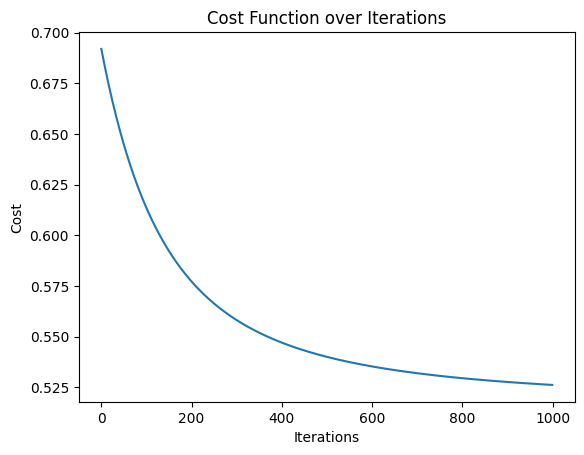

In [53]:
# Plot the cost function over iterations
plt.plot(range(num_iterations), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()


Build a Predictive model

In [56]:
new_input = np.array([11.0,0.2,0.48,2.0,0.34299999999999997,6.0,18.0,0.9979,3.3,0.71,10.5])  # 11 (wine chemical) features
prediction = predict(new_input.reshape(1, -1), weights, bias)  # Make prediction

print("\n Thông số sản phẩm rượu cần kiểm tra:\n", new_input)
if (prediction[0]==1):
  print('Chất lượng rượu tốt')
else:
  print('Chất lượng rượu không tốt - Loại bỏ sản phẩm này')


 Thông số sản phẩm rượu cần kiểm tra:
 [11.      0.2     0.48    2.      0.343   6.     18.      0.9979  3.3
  0.71   10.5   ]
Chất lượng rượu tốt
